# Verification of the Blackbody radiation and CMB distribution

**In this part, we use the Blackbody part of `astropy`  to test the function of AddThermalPhotons in `CRadpy`**

In [1]:
import CRadpy
import numpy as np
import matplotlib.pyplot as plt
import astropy

In [2]:
rad =  CRadpy.Radiation()
rad.AddBlackBodyPhotons(2.7)
raddata = rad.GetRadiationData()

In [3]:
import astropy.modeling
import astropy.units as u
from astropy.constants import c, h, k_B
cmb = raddata.photon_distribution[0]
cmb_astropy = astropy.modeling.physical_models.BlackBody(temperature=2.7 * u.K)

In [4]:
critical_energy = k_B * 2.725 * u.K
cmb_energy_range = np.logspace(np.log10(1e-12 * critical_energy.to(u.eV).value), np.log10(1e3 * critical_energy.to(u.eV).value), 1000) * u.eV

**Here, the cmb_atropy will return the radiation intensity B(T) `erg/(s Hz sr cm^-2)`, we need convert it to the number density**

In [5]:
density_astropy = cmb_astropy(cmb_energy_range) / (c * h * cmb_energy_range) * 4 * np.pi * u.sr
density_astropy = density_astropy.to(u.cm**-3 * u.erg**-1)

/home/zhipz/miniconda3/lib/python3.11/site-packages/astropy/units/quantity.py:671: RuntimeWarning: overflow encountered in expm1
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)
/home/zhipz/miniconda3/lib/python3.11/site-packages/astropy/units/quantity.py:671: RuntimeWarning: overflow encountered in multiply
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


(1e-32, 4.384868835578249e+31)

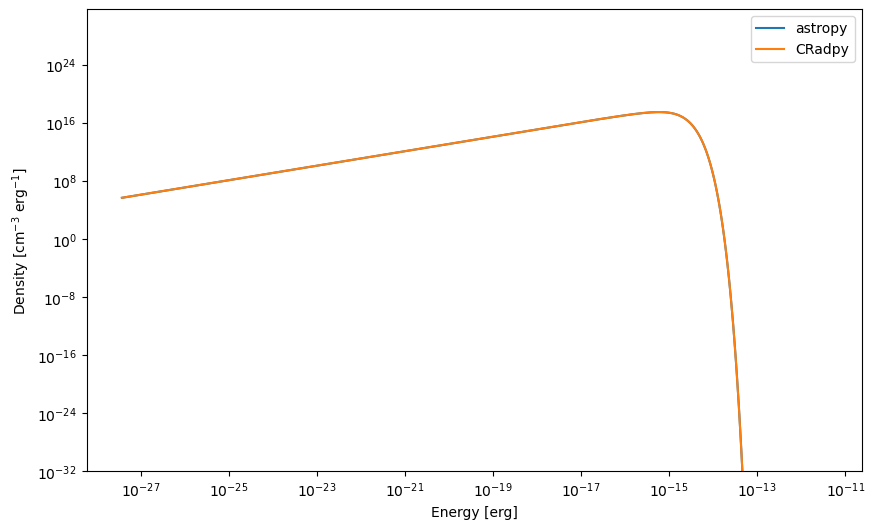

In [6]:
plt.figure(figsize=(10, 6))
plt.xlabel('Energy [erg]')
plt.ylabel('Density [cm$^{-3}$ erg$^{-1}$]')

plt.loglog(cmb_energy_range.to("erg"), density_astropy, label='astropy')
plt.loglog(cmb[::,0], cmb[::,1], label='CRadpy')
plt.legend()
plt.ylim(1e-32)